In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
# Load dataset
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isna().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


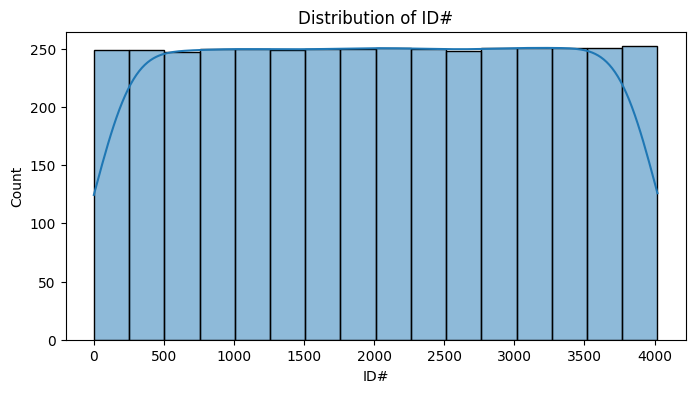

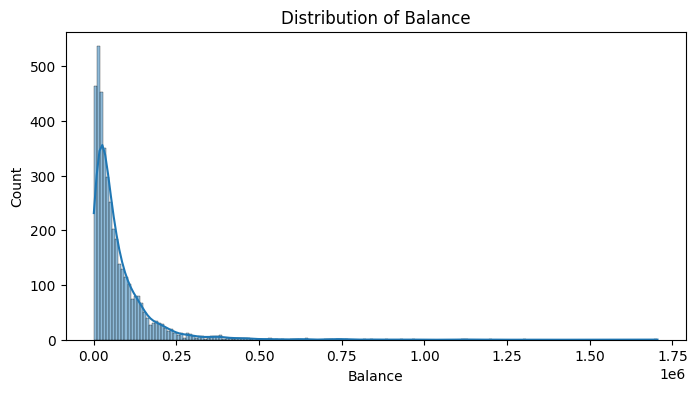

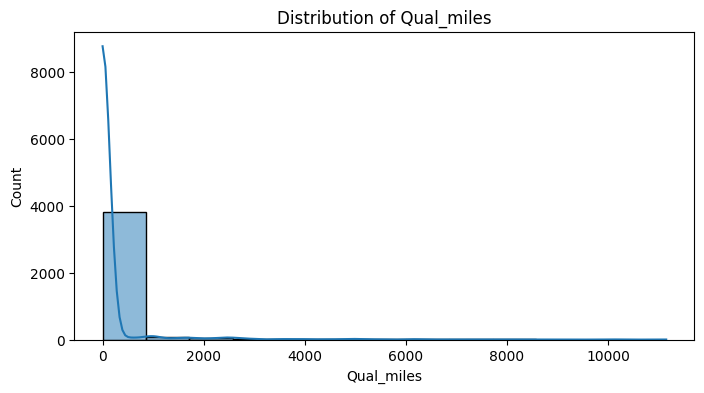

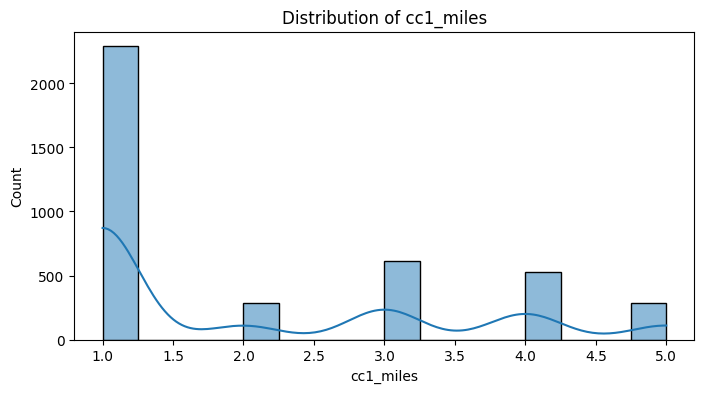

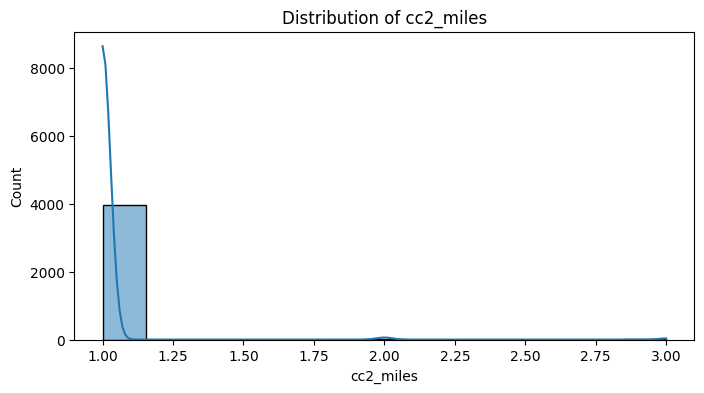

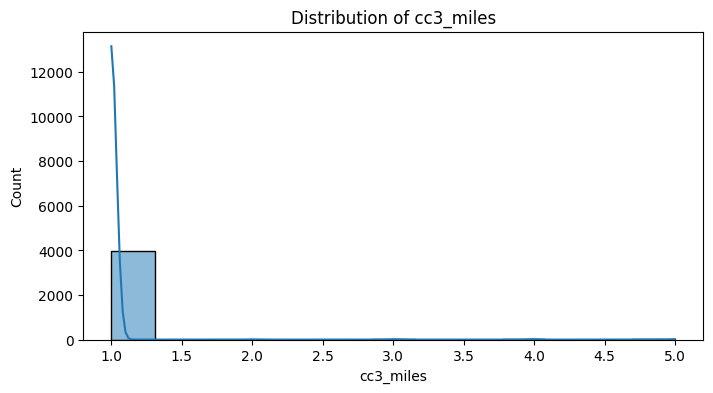

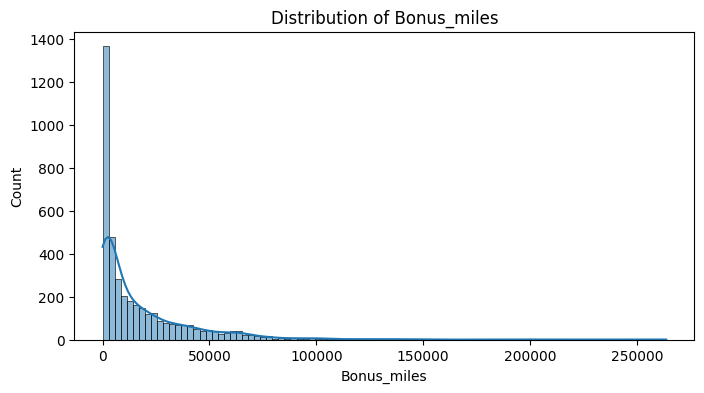

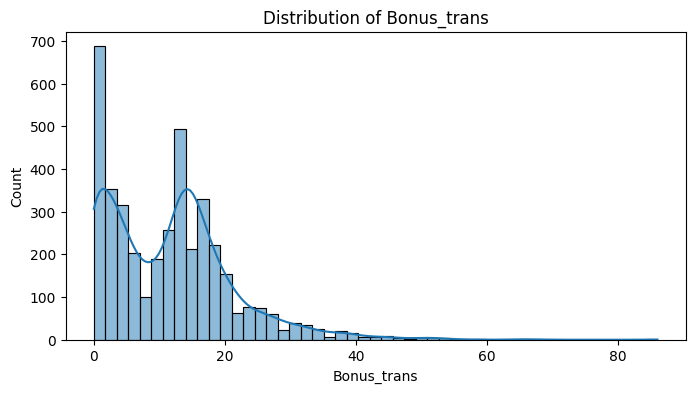

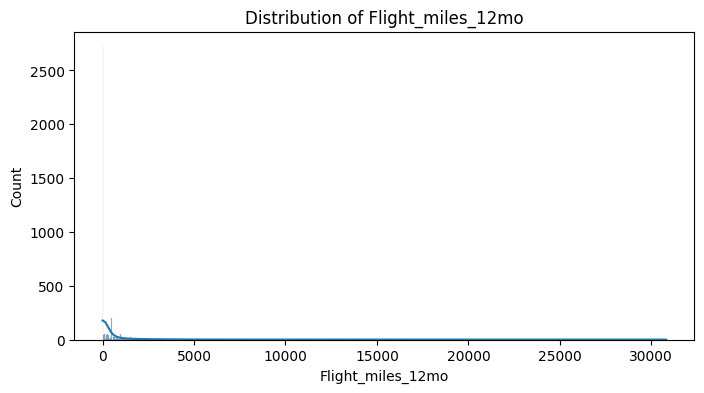

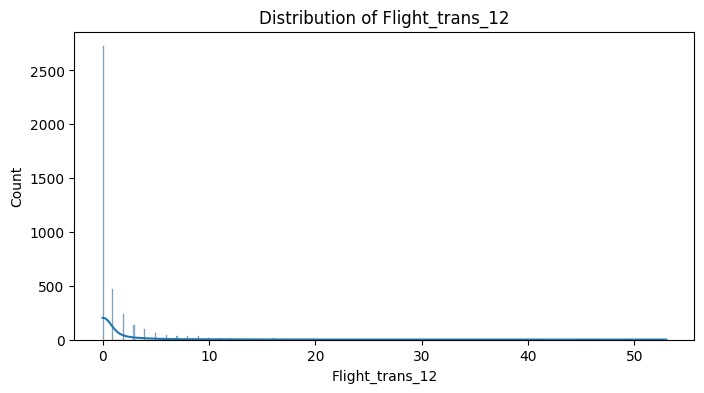

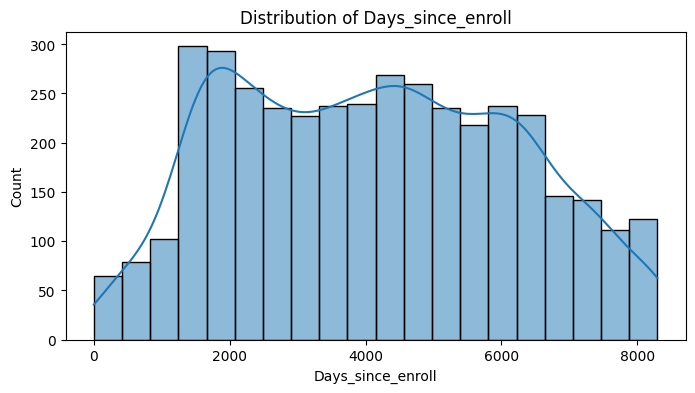

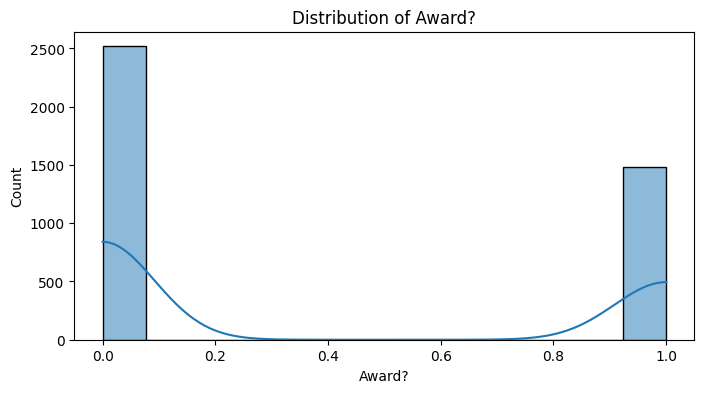

In [14]:
# Visualization

for col in df.columns:
   plt.figure(figsize=(8,4))
   sn.histplot(df[col],kde=True)
   plt.title(f'Distribution of {col}')
   plt.show()

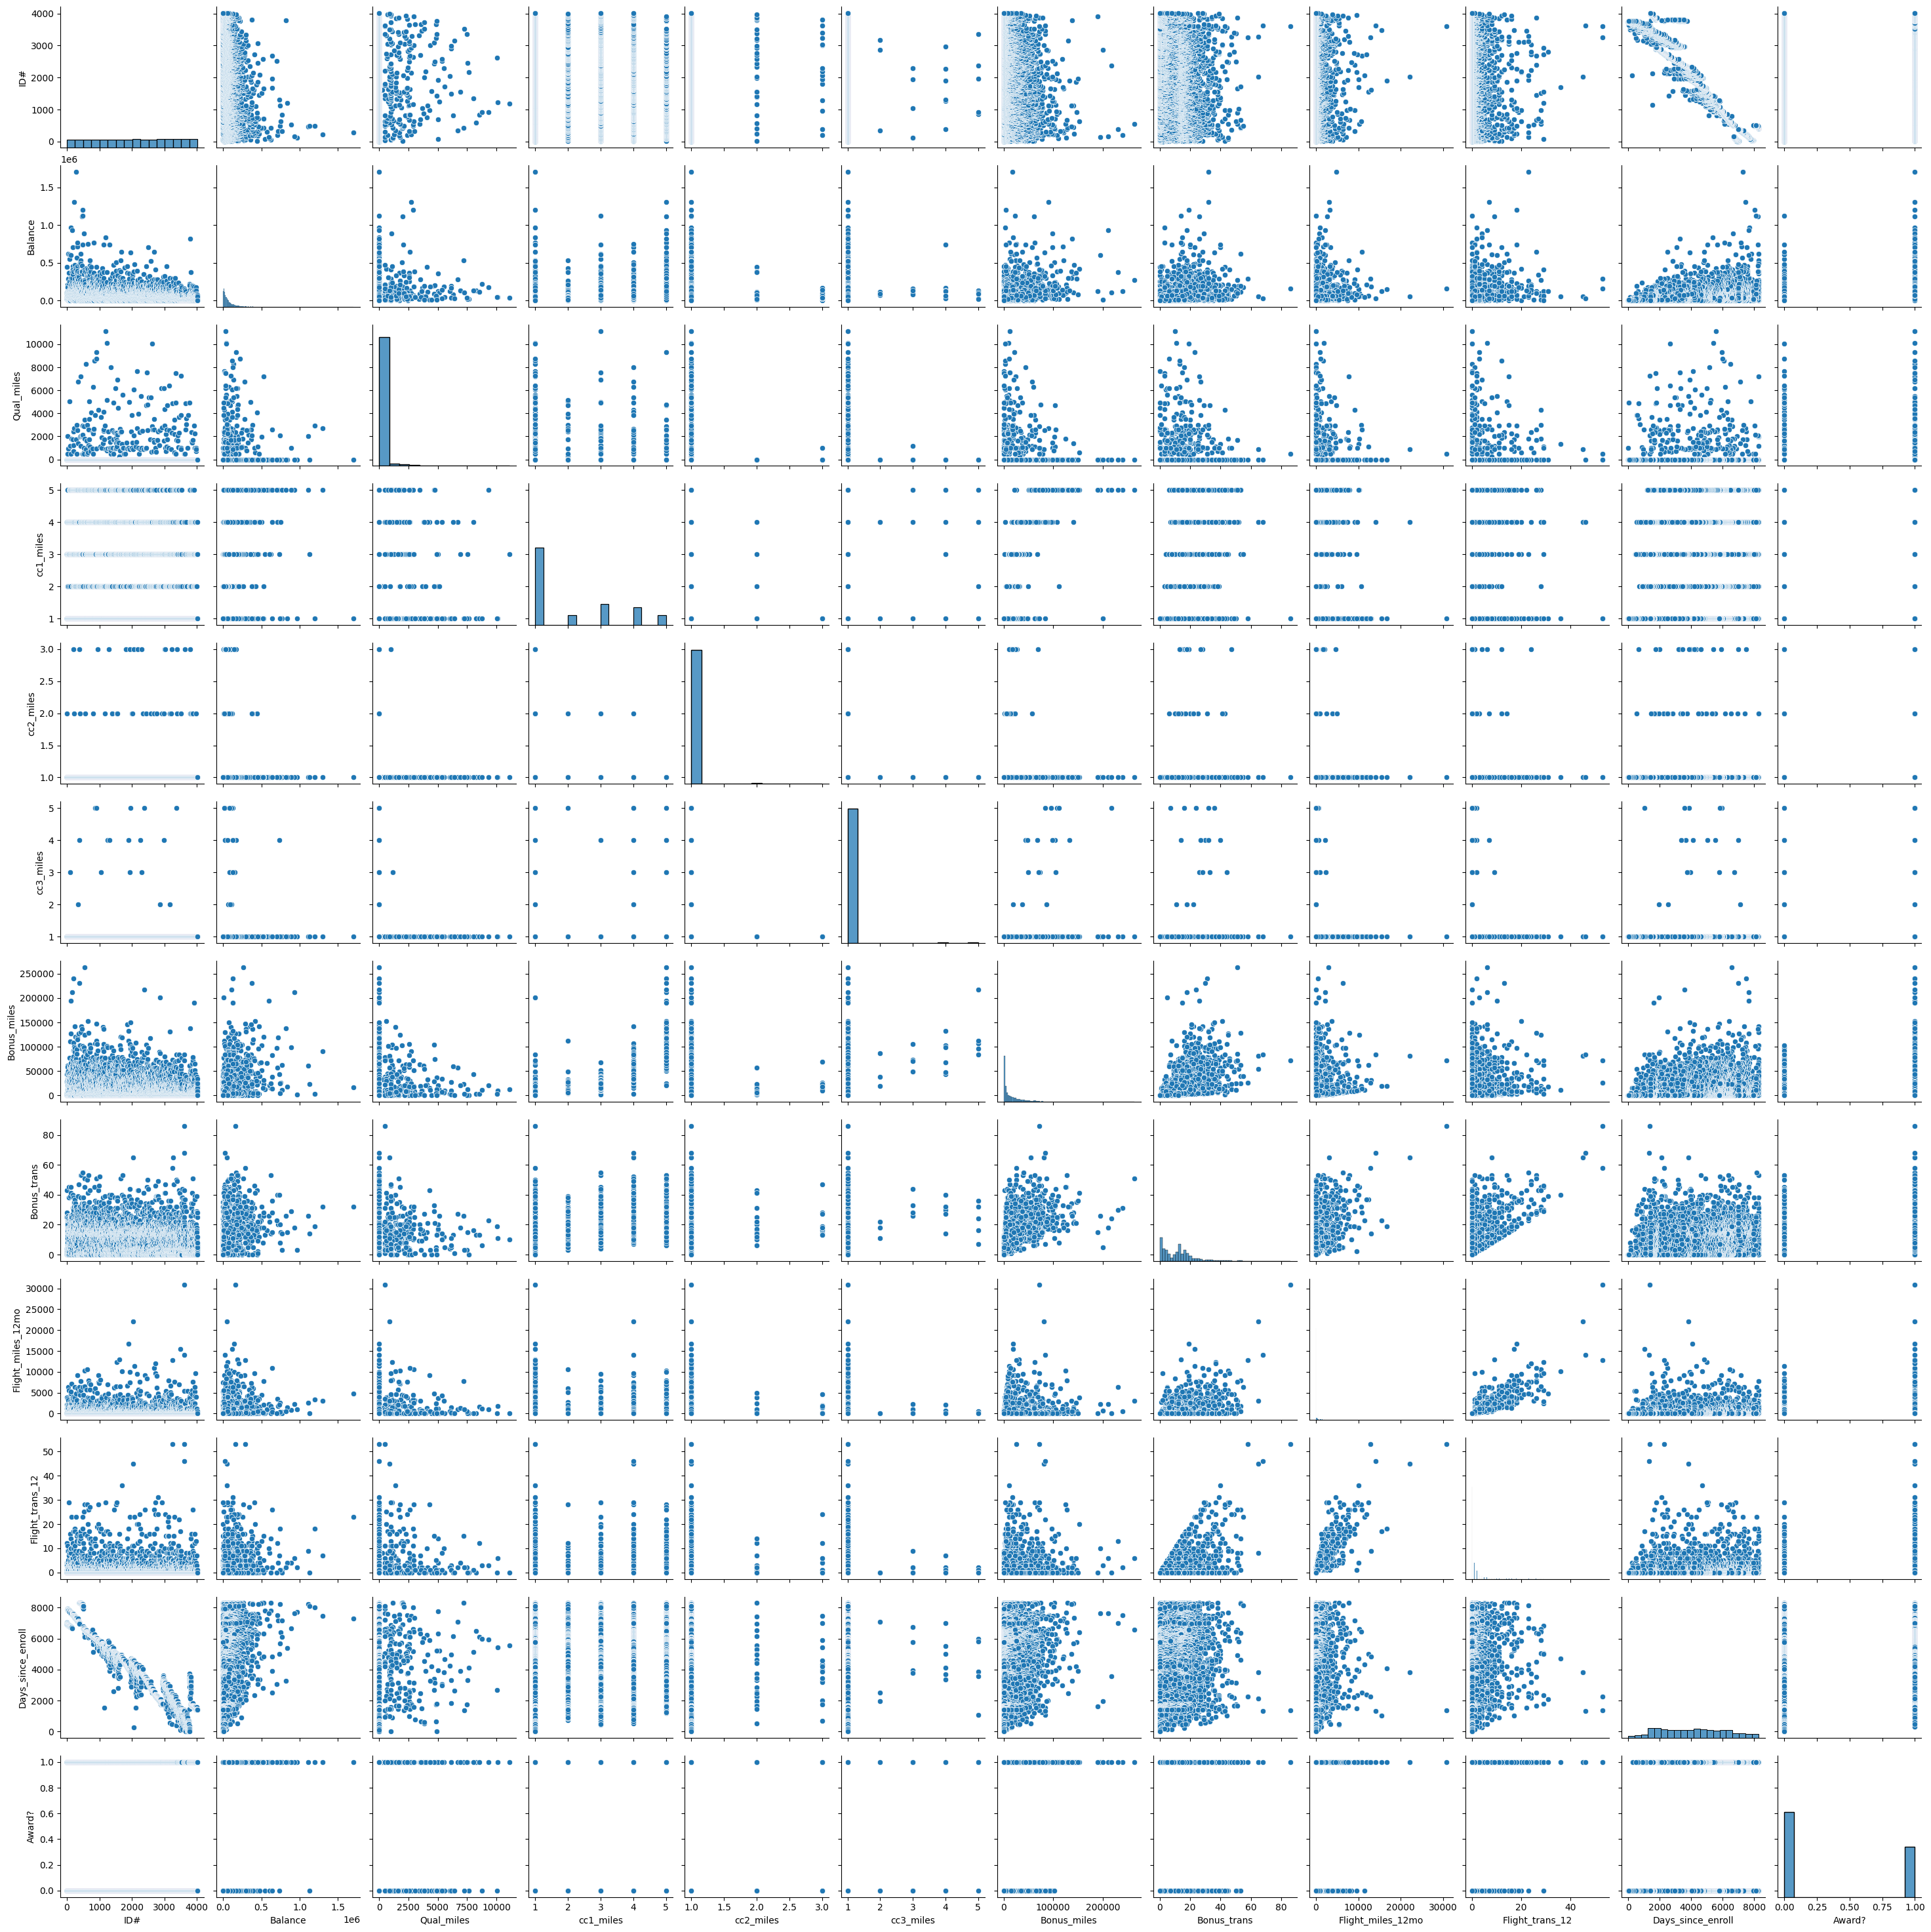

In [15]:
sn.pairplot(df)
plt.show()

<Axes: >

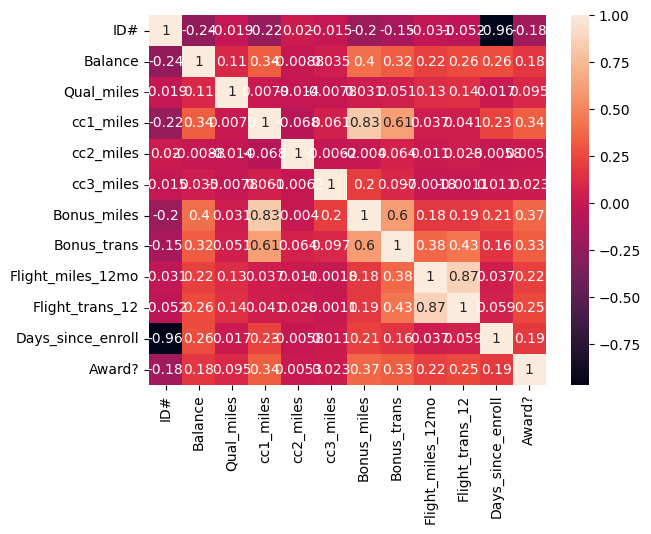

In [18]:
sn.heatmap(df.corr(),annot=True)

Removing Outliers

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID#                   2010.0
Balance              73876.5
Qual_miles               0.0
cc1_miles                2.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles          22550.5
Bonus_trans             14.0
Flight_miles_12mo      311.0
Flight_trans_12          1.0
Days_since_enroll     3460.5
Award?                   1.0
dtype: float64


In [22]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR
print(f'LL : \n {LL}')
print(f'UL : \n {UL}')

LL : 
 ID#                  -2004.50
Balance             -92287.25
Qual_miles               0.00
cc1_miles               -2.00
cc2_miles                1.00
cc3_miles                1.00
Bonus_miles         -32575.75
Bonus_trans            -18.00
Flight_miles_12mo     -466.50
Flight_trans_12         -1.50
Days_since_enroll    -2860.75
Award?                  -1.50
dtype: float64
UL : 
 ID#                    6035.50
Balance              203218.75
Qual_miles                0.00
cc1_miles                 6.00
cc2_miles                 1.00
cc3_miles                 1.00
Bonus_miles           57626.25
Bonus_trans              38.00
Flight_miles_12mo       777.50
Flight_trans_12           2.50
Days_since_enroll     10981.25
Award?                    2.50
dtype: float64


In [25]:
data = df[~((df<LL)| (df>UL)).any(axis=1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
data.shape

(2875, 12)

Standardizing

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaled_data = scaler.fit_transform(data.drop(columns=['ID#','Award?']))

Implement H Clustering

In [30]:
import scipy.cluster.hierarchy as ch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

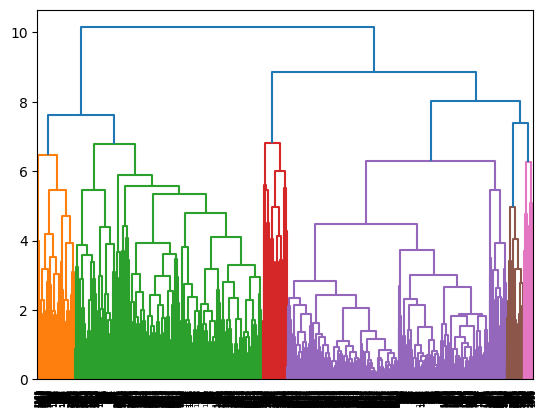

In [33]:
dendrogram = ch.dendrogram(ch.linkage(scaled_data ,method ='complete'))

In [38]:
hc = AgglomerativeClustering(n_clusters=4,linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [39]:
y_hc = hc.fit_predict(scaled_data)
y_hc

array([3, 3, 3, ..., 0, 1, 3])

Implement KMeans Clustering

In [40]:
from sklearn.cluster import KMeans

In [41]:
inertia = []

In [42]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

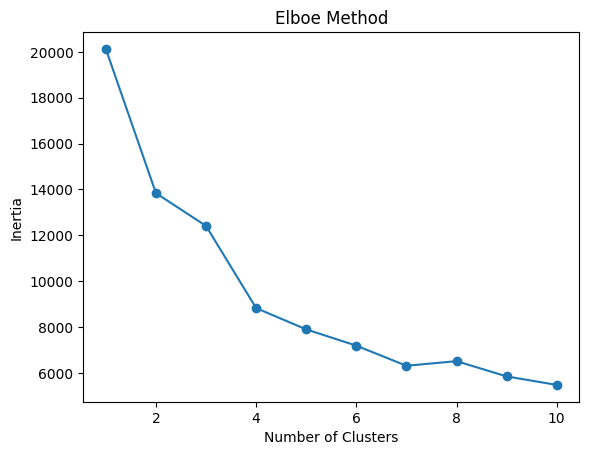

In [43]:
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elboe Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
kc = KMeans(n_clusters=4)
kc.fit(scaled_data)
kc.labels_

array([2, 2, 2, ..., 1, 3, 0], dtype=int32)

Implement DBSCAN Clustering

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
x = np.array(scaled_data)
x

array([[-0.43885929,  0.        , -0.71905467, ..., -0.37883719,
        -0.40970772,  1.50369284],
       [-0.64773487,  0.        , -0.71905467, ..., -0.37883719,
        -0.40970772,  1.48803468],
       [-0.1287733 ,  0.        , -0.71905467, ..., -0.37883719,
        -0.40970772,  1.52032964],
       ...,
       [ 0.62802805,  0.        ,  1.01378873, ..., -0.37883719,
        -0.40970772, -1.23550729],
       [ 0.18915227,  0.        , -0.71905467, ...,  2.93933527,
         1.65318143, -1.23599661],
       [-1.02863529,  0.        , -0.71905467, ..., -0.37883719,
        -0.40970772, -1.23746456]])

In [50]:
db = DBSCAN(eps=3,min_samples=7).fit(x)
labels = db.labels_
unique_labels = set(labels)

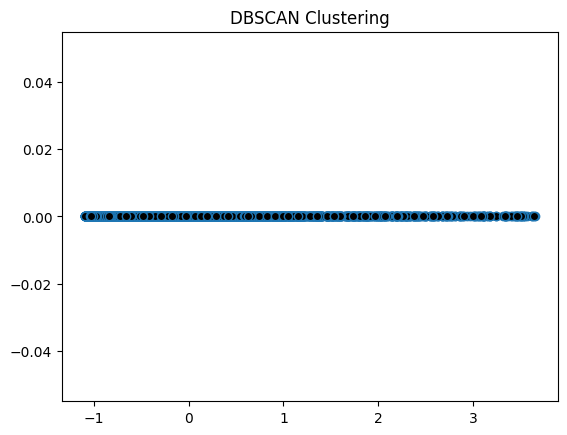

In [52]:
for label in unique_labels:
    class_member_mask = (labels == label)
    cluster_center = scaled_data[class_member_mask]
    plt.plot(cluster_center[:,0],cluster_center[:,1],'o',markerfacecolor='black')
    plt.title('DBSCAN Clustering')
    plt.show()

In [53]:
dbscan = DBSCAN(eps=1.5,min_samples=15)
dbscan.fit_predict(scaled_data)
dbscan.labels_

array([0, 0, 0, ..., 0, 1, 0])

Clustering Summary

In [54]:
data['KMeans_Cluster'] = kc.labels_
data['HC_Cluster'] = hc.labels_
data['DBSCAN_Cluster'] = dbscan.labels_

<ipython-input-54-f1f9cb8dac35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KMeans_Cluster'] = kc.labels_
<ipython-input-54-f1f9cb8dac35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HC_Cluster'] = hc.labels_
<ipython-input-54-f1f9cb8dac35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [55]:
cluster_summary = data.groupby('KMeans_Cluster').mean()
print(cluster_summary)

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               3151.889804  26199.266735         0.0   1.093718        1.0   
1               1836.192802  75886.897172         0.0   3.329049        1.0   
2               1123.722078  35288.328571         0.0   1.138961        1.0   
3               2030.640449  64647.047753         0.0   2.056180        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   2951.351184     5.544799           4.397528   
1                     1.0  26541.767352    16.284062           6.552699   
2                     1.0   3406.171429     6.167532           3.794805   
3                     1.0  14386.702247    11.747191         426.488764   

                Flight_trans_12  Days_since_enroll    Award?  HC_Cluster  

Visual Clustering Results

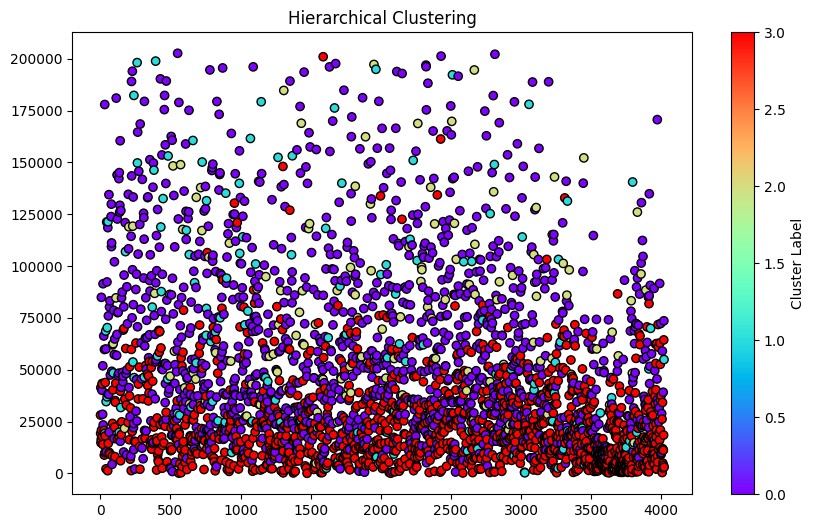

In [56]:
# Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=hc.labels_, cmap='rainbow', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

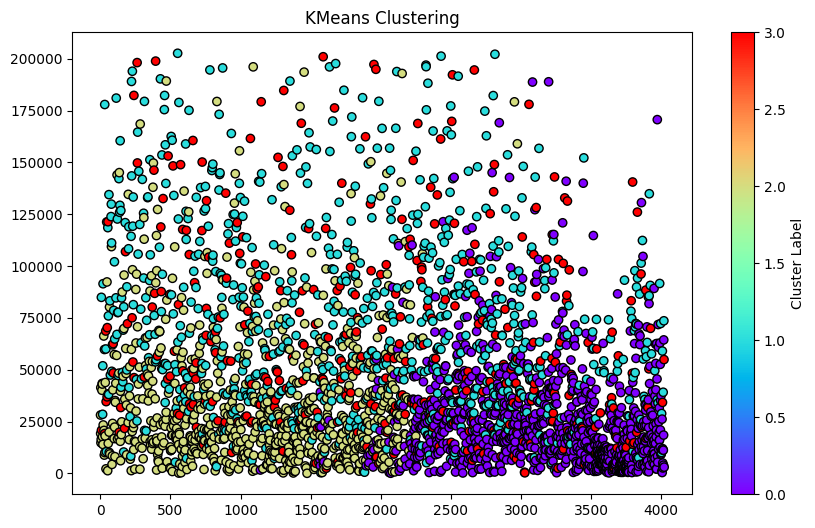

In [57]:
# KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kc.labels_, cmap='rainbow', marker='o', edgecolor='k')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

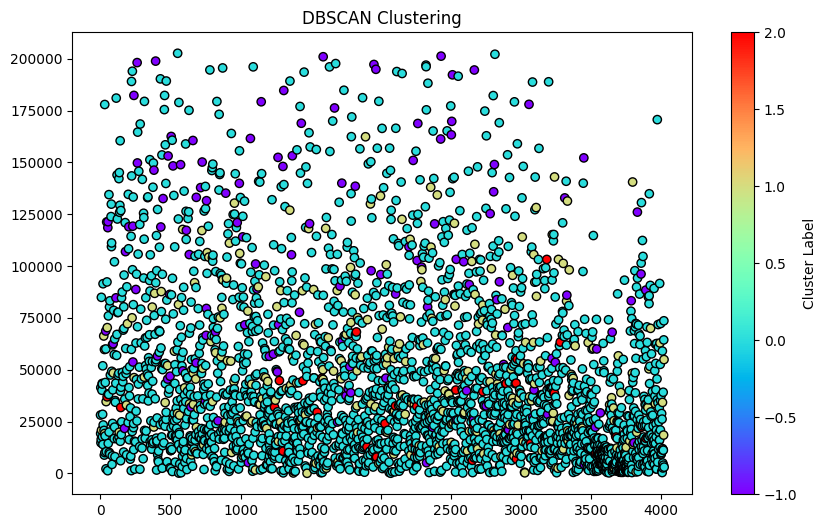

In [58]:
# DBSCAN Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=dbscan.labels_, cmap='rainbow', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

Evaluation and Performance

In [60]:
print(f"Silhouette Score of H Clustering : {silhouette_score(scaled_data,hc.labels_)}")
print(f"Silhouette Score of KMeans Clustering : {silhouette_score(scaled_data,kc.labels_)}")
print(f"Silhouette Score of DBSCAN Clustering : {silhouette_score(scaled_data,dbscan.labels_)}")

Silhouette Score of H Clustering : 0.27054517533967365
Silhouette Score of KMeans Clustering : 0.27168612359833627
Silhouette Score of DBSCAN Clustering : 0.30581265272485747
